In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Synapses properties of a S1 cell

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [3]:
rootFolder = '/home/fernando/S1_netpyne/sim/'
os.chdir(rootFolder)

folder = os.listdir('cell_data/')

In [4]:
# !nrnivmodl mechanisms

In [5]:
folder = sorted(folder)
cellnumber = 760
cellName = folder[cellnumber]

print ("CellNumber = %d" % cellnumber)
print ("CellName = %s" % cellName)

CellNumber = 760
CellName = L5_TTPC1_cADpyr232_1


In [6]:
def loadTemplateName(cellnumber): 
    outFolder = rootFolder+'cell_data/'+folder[cellnumber]
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

cellName = folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)

In [7]:
os.chdir(rootFolder)

from cellwrapper2 import loadCell
cell=loadCell(cellName, cellTemplateName)

soma = cell.soma[0]

Loading constants
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
Loading cell cADpyr232_L5_TTPC1_0fb1ca4724
cADpyr232_L5_TTPC1_0fb1ca4724[0]


## Activating synapses

In [8]:
NETPYNE = [[1, 0, 0.5],
           [2, 1, 0.4051878210727514],
           [2, 2, 0.4312580988132289],
           [3, 0, 0.6183187654292187],
           [3, 1, 0.811724705226512],
           [3, 2, 0.870099665479436],
           [3, 2, 0.15167262364252657]]

In [9]:
expsyn = []
netstim = []
netcon = []

n = 0
for a,b,c in NETPYNE:
    
    expsyn.append(neuron.h.Exp2Syn(c, sec=cell.dend[b]))
    netstim.append(neuron.h.NetStim())
    netcon.append(neuron.h.NetCon(netstim[n],expsyn[n]))
    netstim[n].noise = 0
    netcon[n].delay = 0.1
    
    if a < 3:
        expsyn[n].tau1 = 0.2
        expsyn[n].tau2 = 1.74
        expsyn[n].e = 0        
        netcon[n].weight[0] = 0.0015
        
        if a == 1:
            netstim[n].start = 1500
            netstim[n].interval = 600
        else:
            netstim[n].start = 1700
            netstim[n].interval = 425
        
    else:
        expsyn[n].tau1 = 0.2
        expsyn[n].tau2 = 8.3
        expsyn[n].e = -80        
        netcon[n].weight[0] = 0.00075
        netstim[n].start = 1900
        netstim[n].interval = 250
    
    n+=1

In [10]:
neuron.h.dt = 0.025
neuron.h.cvode_active(0)
neuron.h.tstop = 2400 # ms
neuron.h.celsius = 34
neuron.h.v_init = -70.0

time = neuron.h.Vector()
voltage = neuron.h.Vector()
ik = neuron.h.Vector()


time.record(neuron.h._ref_t)
voltage.record(soma(.5)._ref_v);
ik.record(soma(.5)._ref_ik);

neuron.h.run()

0.0

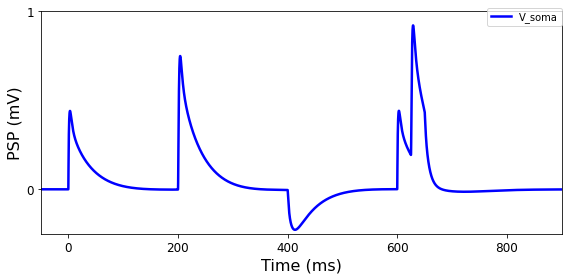

In [11]:
figSize = (8,4)
fig = plt.figure(figsize=figSize)  # Open a new figure
clr = ["blue", "blue","green","gray", "red"]
number=0
for i in range(1):
    for number2 in range(i,5,5):
        plt.plot(time,voltage-voltage[60000], label= 'V_soma', linewidth=2.5, color=clr[i])
        number+=1

plt.legend(loc='upper right', bbox_to_anchor=(1.01, 1.04))
plt.xlim(1450,2400)
plt.ylim(-0.25,1.0)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('PSP (mV)', fontsize=16)
plt.xticks(range(1500,2500,200), range(0,1000,200), fontsize=12);
plt.yticks([0,1], fontsize=12);
plt.ion()
plt.tight_layout()


In [17]:
import json

with open('/home/fernando/voltage.json', 'w') as outfile:
    json.dump(list(voltage), outfile)